<a href="https://colab.research.google.com/github/architgore/INST-Final-Project/blob/main/instfinalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INST Final Project



```
# This is formatted as code
```

NBA Basketball Data 2014-2015 

In [ ]:
import pandas as pd
import numpy as np from datascience import *
import seaborn as sns
import plotly.express as px

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from google.colab import drive
drive.mount('/content/drive')

df = (pd.read_csv('/content/sample_data/player_data.csv'))
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,25,HOU,81,459,565,154,60,321,2217
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900
3,Anthony Davis,21,NOP,68,696,149,100,200,95,1656
4,DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946


In [ ]:
salary_data = pd.read_csv('/content/sample_data/salary_data.csv')
salary_data

,PlayerName,Salary
0,Kobe Bryant,23500000
1,Amar'e Stoudemire,23410988
2,Joe Johnson,23180790
3,Carmelo Anthony,22458401
4,Dwight Howard,21436271
...,...,...
487,Sim Bhullar,29843
488,David Stockton,29843
489,David Wear,29843
490,Andre Dawkins,29843


In [ ]:
player_data = pd.read_csv('/content/sample_data/player_data.csv')
player_data

,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,James Harden,25,HOU,81,459,565,154,60,321,2217
1,Chris Paul,29,LAC,82,376,838,156,15,190,1564
2,Stephen Curry,26,GSW,80,341,619,163,16,249,1900
3,Anthony Davis,21,NOP,68,696,149,100,200,95,1656
4,DeAndre Jordan,26,LAC,82,1226,61,81,183,109,946
...,...,...,...,...,...,...,...,...,...,...
487,Adreian Payne,23,TOT,32,162,30,19,9,44,213
488,Ricky Ledo,22,TOT,17,36,19,6,1,26,90
489,Gary Harris,20,DEN,55,64,29,39,7,38,188
490,Zach LaVine,19,MIN,77,214,276,54,10,193,778


In [ ]:
full_data = salary_data.merge(player_data, left_on="PlayerName", right_on="Name")
full_data

,PlayerName,Salary,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
0,Kobe Bryant,23500000,Kobe Bryant,36,LAL,35,199,197,47,7,128,782
1,Amar'e Stoudemire,23410988,Amar'e Stoudemire,32,TOT,59,329,45,29,38,78,680
2,Joe Johnson,23180790,Joe Johnson,33,BRK,80,384,292,59,14,137,1154
3,Carmelo Anthony,22458401,Carmelo Anthony,30,NYK,40,264,122,40,17,89,966
4,Dwight Howard,21436271,Dwight Howard,29,HOU,41,431,50,28,53,115,646
...,...,...,...,...,...,...,...,...,...,...,...,...
487,Sim Bhullar,29843,Sim Bhullar,22,SAC,3,1,1,0,1,0,2
488,David Stockton,29843,David Stockton,23,SAC,3,2,9,2,0,4,8
489,David Wear,29843,David Wear,24,SAC,2,2,1,0,0,0,0
490,Andre Dawkins,29843,Andre Dawkins,23,MIA,4,2,1,0,0,1,3


In [ ]:
full_data_with_value = full_data.copy() # make a copy of the full_data table
full_data_with_value["Value"] = full_data.apply(lambda row: row["Points"] / (row["Salary"]/1000), axis=1) 
#Divided salary by 1000, and that by points to see each individual players value based on salary and points. 

In [ ]:
full_data_with_value

,PlayerName,Salary,Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Value
0,Kobe Bryant,23500000,Kobe Bryant,36,LAL,35,199,197,47,7,128,782,0.033277
1,Amar'e Stoudemire,23410988,Amar'e Stoudemire,32,TOT,59,329,45,29,38,78,680,0.029046
2,Joe Johnson,23180790,Joe Johnson,33,BRK,80,384,292,59,14,137,1154,0.049783
3,Carmelo Anthony,22458401,Carmelo Anthony,30,NYK,40,264,122,40,17,89,966,0.043013
4,Dwight Howard,21436271,Dwight Howard,29,HOU,41,431,50,28,53,115,646,0.030136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,Sim Bhullar,29843,Sim Bhullar,22,SAC,3,1,1,0,1,0,2,0.067017
488,David Stockton,29843,David Stockton,23,SAC,3,2,9,2,0,4,8,0.268070
489,David Wear,29843,David Wear,24,SAC,2,2,1,0,0,0,0,0.000000
490,Andre Dawkins,29843,Andre Dawkins,23,MIA,4,2,1,0,0,1,3,0.100526


array([[<Axes: title={'center': 'Value'}>]], dtype=object)

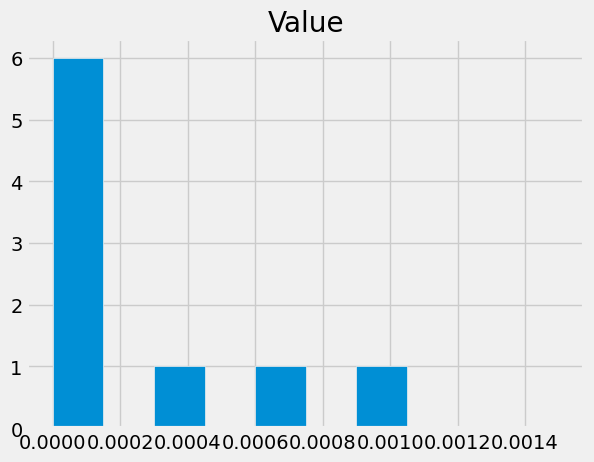

In [ ]:
full_data_with_value.hist('Value', bins = 10, range = make_array(0,0.0015))

In [ ]:
# Create a scatter plot to visualize the relationship between age and points scored
fig = px.scatter(df, x='Age', y='Points', color='Team', hover_data=['Name'])
fig.update_layout(title='Points Scored by Age and Team', xaxis_title='Age', yaxis_title='Points')
fig.show()

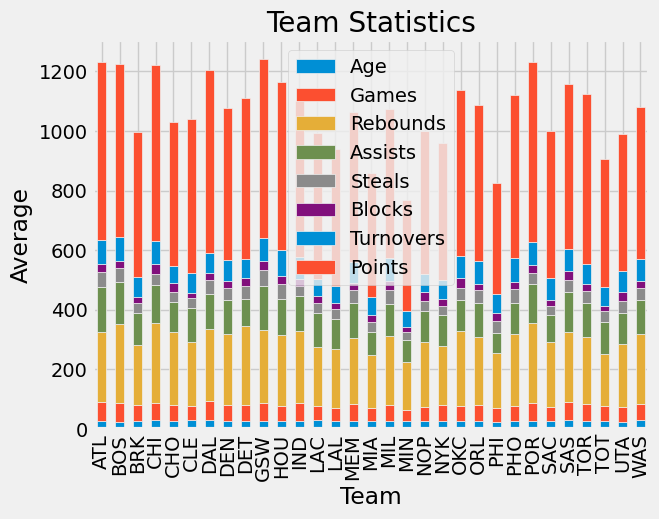

In [ ]:
df_grouped.plot(kind='bar', stacked=True)
plt.title('Team Statistics')
plt.xlabel('Team')
plt.ylabel('Average')
plt.show()

<ipython-input-159-91148ffaf84c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



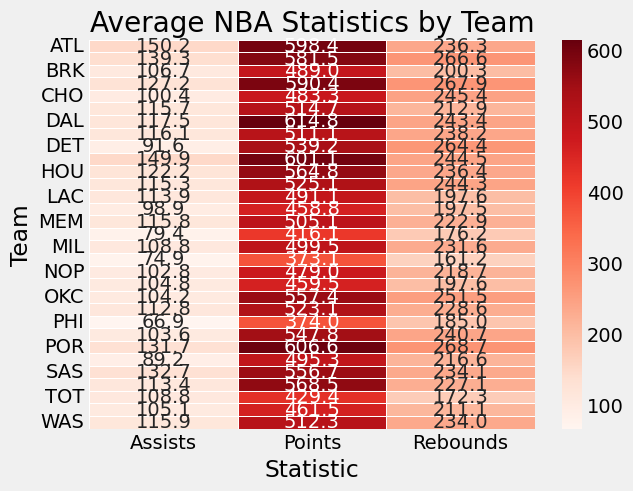

In [ ]:
df_grouped = df.groupby('Team').mean().reset_index()

# Pivot the data to create a matrix of mean values for each team and each statistic
df_pivoted = df_grouped.pivot_table(index='Team', values=['Points', 'Assists', 'Rebounds'])

sns.heatmap(df_pivoted, cmap='Reds', annot=True, fmt='.1f', linewidths=.5)

# Set the title and axis labels
plt.title('Average NBA Statistics by Team')
plt.xlabel('Statistic')
plt.ylabel('Team')

# Display the heatmap
plt.show()

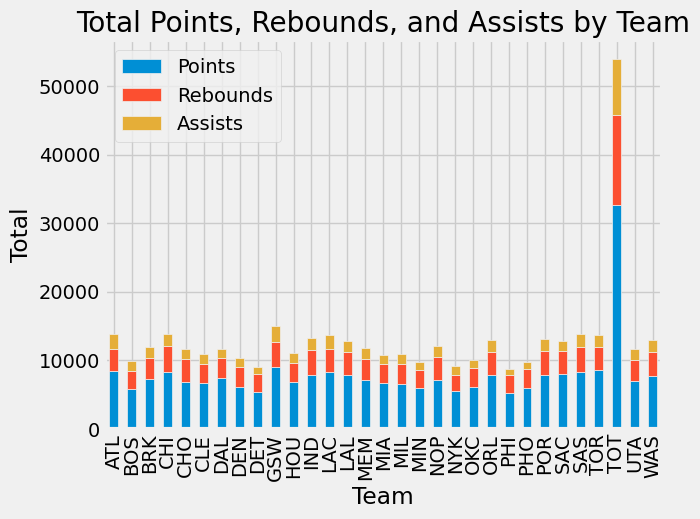

In [ ]:
df = pd.read_csv('/content/sample_data/player_data.csv')
cols = ['Team', 'Points', 'Rebounds', 'Assists']

# Group the data by team and calculate the total points, rebounds, and assists for each team
grouped_df = df[cols].groupby(['Team']).sum()

# Create a stacked bar chart of the total points, rebounds, and assists for each team
grouped_df.plot(kind='bar', stacked=True)
plt.title('Total Points, Rebounds, and Assists by Team')
plt.xlabel('Team')
plt.ylabel('Total')
plt.show()

#This visualization can help us compare the offensive and defensive performance of different teams in the league, and identify which teams have the strongest overall performance. We can also see how the points, rebounds, and assists are distributed among the different teams, and if there are any teams that excel in one category over the others.

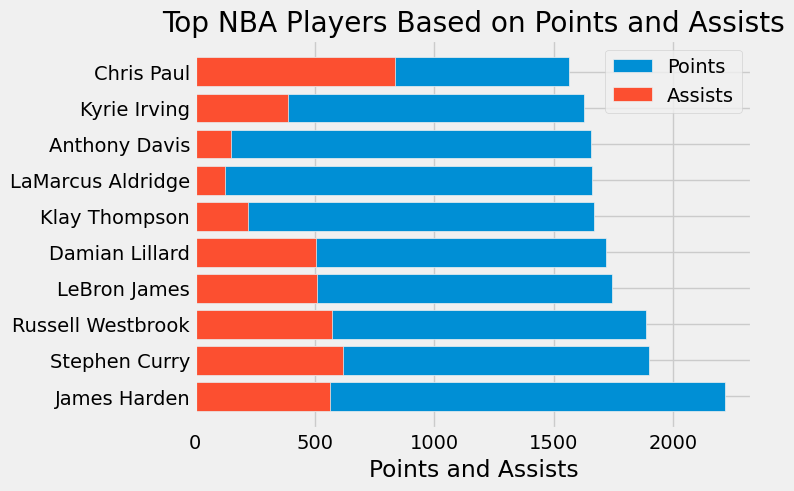

In [ ]:
cols = ['Name', 'Points', 'Assists']
df = df[cols].sort_values(by=['Points', 'Assists'], ascending=False)

# Select the top 10 players based on points and assists
top_players = df.head(10)

# Create a horizontal bar chart to visualize the top players based on points and assists
fig, ax = plt.subplots()
ax.barh(top_players['Name'], top_players['Points'], label='Points')
ax.barh(top_players['Name'], top_players['Assists'], label='Assists')
ax.set_xlabel('Points and Assists')
ax.set_title('Top NBA Players Based on Points and Assists')
ax.legend()
plt.show()

<ipython-input-149-766b0b74a1c4>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



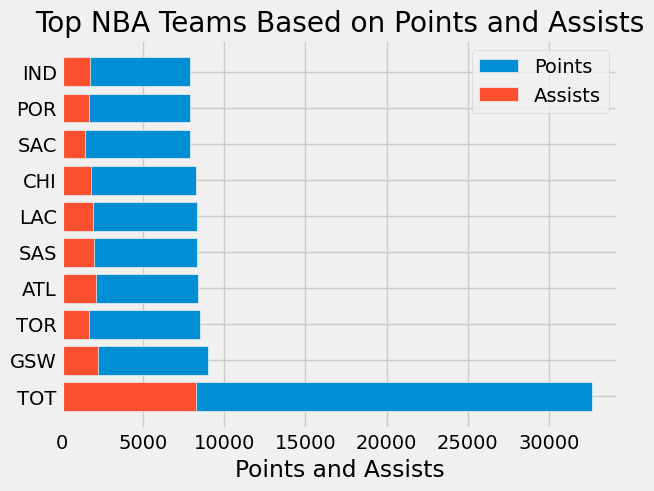

In [ ]:
df = pd.read_csv('/content/sample_data/player_data.csv')

# Group the data by team and sum the points and assists for each team
team_data = df.groupby('Team').sum()[['Points', 'Assists']]

# Sort the teams by points and assists
team_data = team_data.sort_values(by=['Points', 'Assists'], ascending=False)

# Select the top 10 teams based on points and assists
top_teams = team_data.head(10)

# Create a horizontal bar chart to visualize the top teams based on points and assists
fig, ax = plt.subplots()
ax.barh(top_teams.index, top_teams['Points'], label='Points')
ax.barh(top_teams.index, top_teams['Assists'], label='Assists')
ax.set_xlabel('Points and Assists')
ax.set_title('Top NBA Teams Based on Points and Assists')
ax.legend()
plt.show()

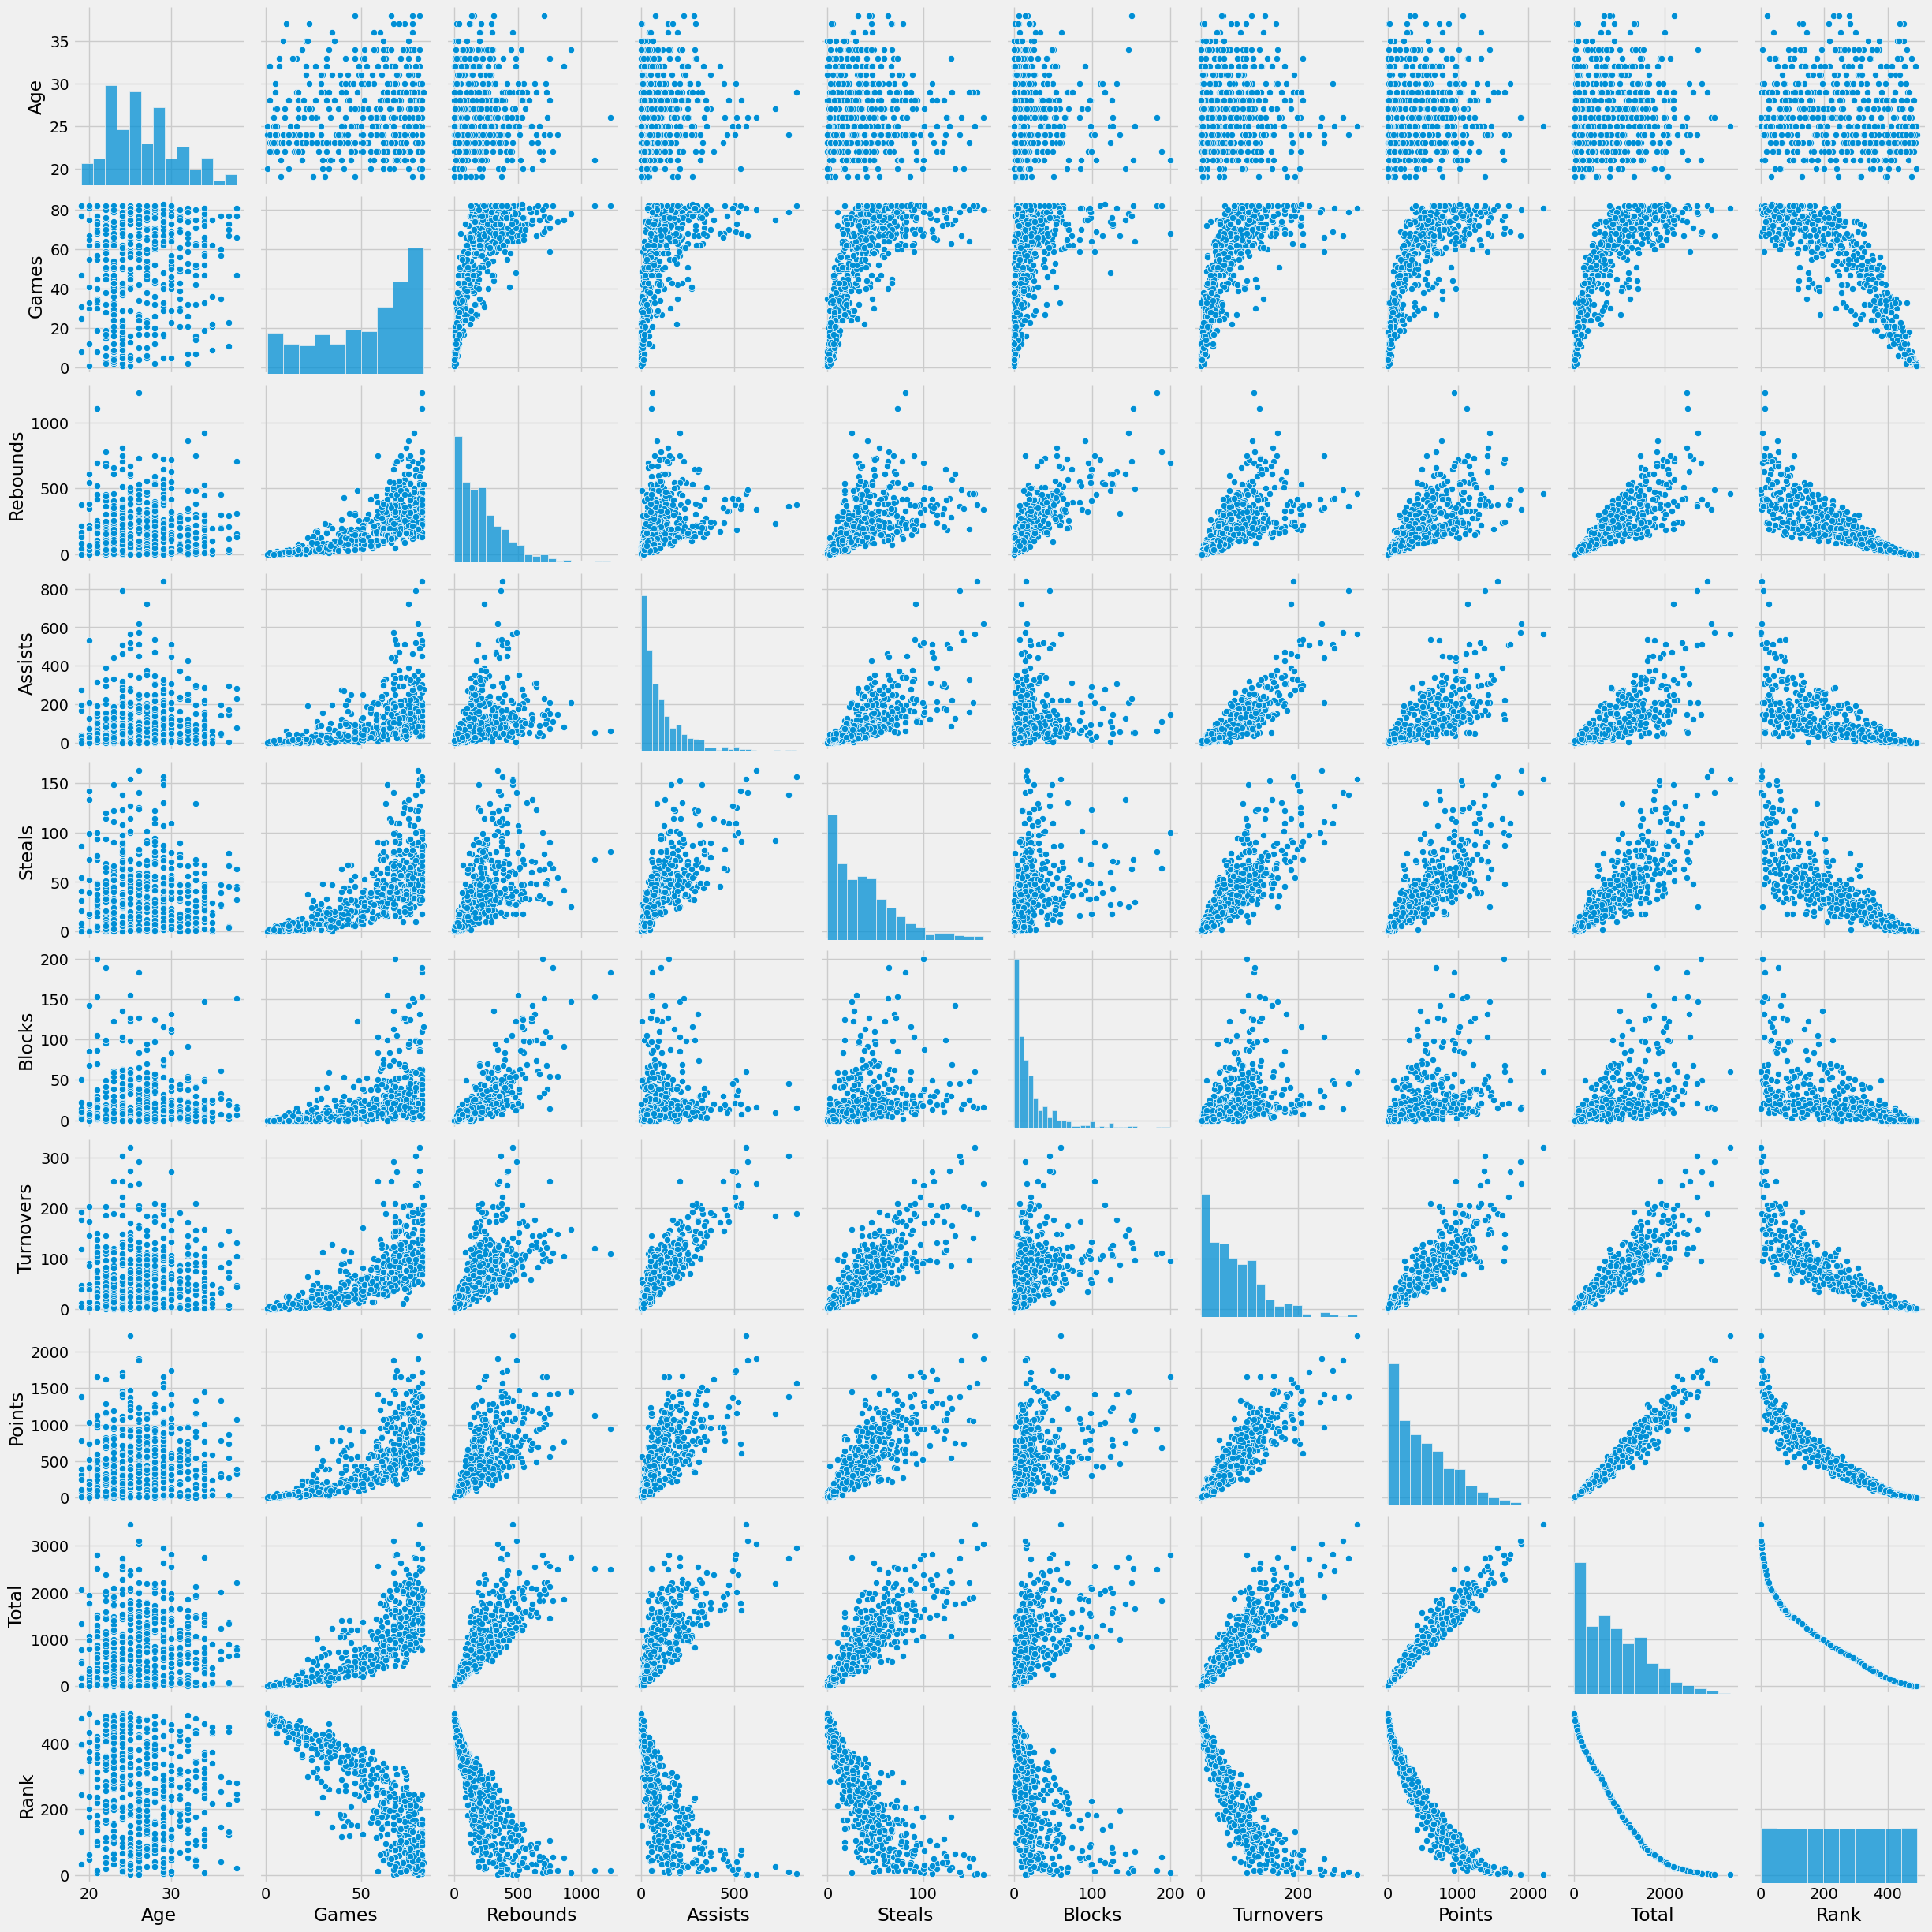

In [ ]:
sns.pairplot(df, kind='scatter')